In [1]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from scipy.stats import gaussian_kde

from edward.models import Normal, Empirical

plt.style.use('ggplot')

In [2]:
# Model
N = 1000

mu0 = 0.0
sigma0 = 1.0
sigma = 1.0
mu = Normal(loc=mu0, scale=sigma0)
x = Normal(loc=mu, scale=sigma, sample_shape=N)

In [3]:
# Data
sess = ed.get_session()
x_data, mu_data = sess.run([x, mu])

In [4]:
np.mean(x_data)

-0.62054485

In [5]:
mu_data

-0.59973675

In [6]:
# True posterior (Normal is conjugate to Normal)
sigma_post = 1./(1./sigma0 + N/sigma)
mu_post = sigma_post * (mu0/sigma0 + np.sum(x_data)/sigma)
true_qmu = Normal(tf.cast(mu_post, tf.float32), tf.cast(sigma_post, tf.float32))

In [7]:
# Proposal distribution
proposal_mu = Normal(loc=mu, scale=.1)

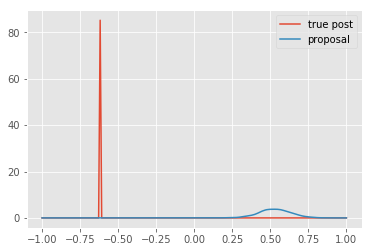

In [8]:
# Proposal vs True posterior
n_samples = 1000

prop = proposal_mu.sample(n_samples).eval()
true_post = true_qmu.sample(n_samples).eval()

prop_density = gaussian_kde(prop)
true_posterior_density = gaussian_kde(true_post)

xs = np.linspace(-1,1,200)
plt.plot(xs, true_posterior_density(xs), label='true post')
plt.plot(xs, prop_density(xs), label='proposal')
plt.legend()
plt.show()

In [9]:
# Inference
T = 500
qmu = Empirical(tf.Variable(tf.zeros(T)))

inference = ed.MetropolisHastings({mu: qmu}, {mu: proposal_mu}, data={x: x_data})
inference.run()

/home/pedro/IST/Thesis/edward-venv/lib/python3.5/site-packages/edward/util/random_variables.py:50: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


500/500 [100%] ██████████████████████████████ Elapsed: 3s | Acceptance Rate: 0.349


In [10]:
qmu.sample().eval()

-0.6389236

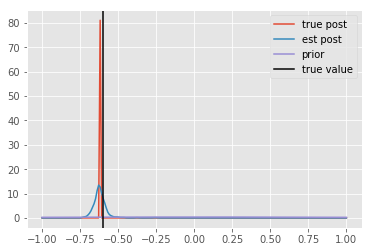

In [11]:
n_samples = 1000

samples_post = qmu.sample(n_samples).eval()
samples_prior = mu.sample(n_samples).eval()
true_post = true_qmu.sample(n_samples).eval()

posterior_density = gaussian_kde(samples_post)
prior_density = gaussian_kde(samples_prior)
true_posterior_density = gaussian_kde(true_post)

xs = np.linspace(-1,1,200)
plt.plot(xs, true_posterior_density(xs), label='true post')
plt.plot(xs, posterior_density(xs), label='est post')
plt.plot(xs, prior_density(xs), label='prior')
plt.axvline(x=mu_data, c='black', label='true value')
plt.legend()
plt.show()

In [12]:
np.mean(x_data)

-0.62054485

In [13]:
qmu.mean().eval()

-0.6188989

In [14]:
true_qmu.mean().eval()

-0.61992496

In [15]:
true_qmu.mean().eval()

-0.61992496

In [16]:
mu_data

-0.59973675